# Formula 1 Championship Analysis (2022-2024)

## Overview
This notebook provides a comprehensive analysis of Formula 1 data from 2022 to 2024, examining various aspects of race performance, championship standings, and team dynamics. Through data visualization and statistical analysis, we explore patterns and trends in F1 racing across multiple seasons.

## Key Analysis Areas
- Championship standings and points distribution
- Team and driver performance metrics
- Qualifying session analysis
- Race results and DNF patterns
- Track-specific performance trends

## Data Sources
- Race results and qualifying data
- Driver and constructor standings
- Race schedules and circuit information

All data is sourced from the official Formula 1 Ergast API and processed for analysis.

This notebook is organized into the following sections:

1. Data Loading and Preparation
   - Import libraries
   - Load and merge data from CSV files
   - Save merged datasets

2. Data Quality Analysis
   - Check data types
   - Analyze missing values
   - Validate data consistency

3. Feature Engineering
   - Convert qualifying times to seconds
   - Create finish status categories
   - Calculate position changes
   - Save enhanced datasets

4. Championship Analysis
   - Points distribution analysis
   - Constructor performance comparison
   - Win distribution analysis
   - Points progression analysis

5. Race Performance Analysis
   - DNF analysis
   - Track performance patterns
   - Position changes analysis

6. Qualifying Analysis
   - Pole position distribution
   - Qualifying time improvements
   - Session performance comparison

7. Schedule Analysis
   - Race calendar distribution
   - Season comparison

## Import Libraries

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better visualizations
plt.style.use('seaborn')


C:\Users\Fares\AppData\Local\Temp\ipykernel_26996\1529998432.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [166]:
# Define F1 team colors for 2022-2024
f1_team_colors = {
    'Red Bull': '#0600EF',  # Dark Blue
    'Mercedes': '#00D2BE',  # Turquoise
    'Ferrari': '#DC0000',    # Red
    'McLaren': '#FF8700',    # Orange
    'Aston Martin': '#006F62',  # British Racing Green
    'Alpine': '#0090FF',     # Blue
    'Williams': '#005AFF',   # Blue
    'AlphaTauri': '#2B4562', # Navy Blue
    'Alfa Romeo': '#900000', # Dark Red
    'Haas': '#FFFFFF'        # White
}

# Define driver colors (based on their most recent team)
driver_team_mapping = {
    'Max Verstappen': 'Red Bull',
    'Sergio Perez': 'Red Bull',
    'Lewis Hamilton': 'Mercedes',
    'George Russell': 'Mercedes',
    'Charles Leclerc': 'Ferrari',
    'Carlos Sainz': 'Ferrari',
    'Lando Norris': 'McLaren',
    'Oscar Piastri': 'McLaren',
    'Fernando Alonso': 'Aston Martin',
    'Lance Stroll': 'Aston Martin'
}

# Get color for driver based on their team
def get_driver_color(driver_name):
    team = driver_team_mapping.get(driver_name)
    return f1_team_colors.get(team, '#666666')  # Default gray if team not found

## Load and Merge Data

In [167]:
# Read standings data for each year
driver_standings = {}
constructor_standings = {}

for year in [2022, 2023, 2024]:
    driver_standings[year] = pd.read_csv(f"data_csv/driver_standings_{year}.csv")
    constructor_standings[year] = pd.read_csv(f"data_csv/constructor_standings_{year}.csv")

# Merge all standings data
all_driver_standings = pd.concat(driver_standings.values(), ignore_index=True)
all_constructor_standings = pd.concat(constructor_standings.values(), ignore_index=True)

# Display sample of merged data
print("Driver Standings Sample:")
display(all_driver_standings.head())
print("\nConstructor Standings Sample:")
display(all_constructor_standings.head())

Driver Standings Sample:


,year,position,driverName,constructorName,points,wins
0,2022,1,Max Verstappen,Red Bull,454,15
1,2022,2,Charles Leclerc,Ferrari,308,3
2,2022,3,Sergio Pérez,Red Bull,305,2
3,2022,4,George Russell,Mercedes,275,1
4,2022,5,Carlos Sainz,Ferrari,246,1



Constructor Standings Sample:


,year,position,constructorName,points,wins
0,2022,1,Red Bull,759,17
1,2022,2,Ferrari,554,4
2,2022,3,Mercedes,515,1
3,2022,4,Alpine F1 Team,173,0
4,2022,5,McLaren,159,0


## Save Merged Data

In [168]:
# Create analyses folder if it doesn't exist
Path("analyses").mkdir(exist_ok=True)

# Save merged data
all_driver_standings.to_csv("analyses/all_driver_standings.csv", index=False)
all_constructor_standings.to_csv("analyses/all_constructor_standings.csv", index=False)

print("Merged data saved to analyses folder")

Merged data saved to analyses folder


In [169]:
# Load schedule data if not already loaded
schedules = {}
for year in [2022, 2023, 2024]:
	schedules[year] = pd.read_csv(f'data_csv/schedule_{year}.csv')
	schedules[year]['year'] = year

# Merge all schedules
all_schedules = pd.concat(schedules.values(), ignore_index=True)
all_schedules['date'] = pd.to_datetime(all_schedules['date'])

# Create analyses folder if it doesn't exist
Path("analyses").mkdir(exist_ok=True)

# Save all merged datasets
all_driver_standings.to_csv("analyses/all_driver_standings.csv", index=False)
all_constructor_standings.to_csv("analyses/all_constructor_standings.csv", index=False)
all_race_results.to_csv("analyses/all_race_results.csv", index=False)
all_qualifying_results.to_csv("analyses/all_qualifying_results.csv", index=False)
all_schedules.to_csv("analyses/all_schedules.csv", index=False)

print("All merged data saved to analyses folder:")
print("- Driver standings")
print("- Constructor standings")
print("- Race results")
print("- Qualifying results")
print("- Race schedules")

All merged data saved to analyses folder:
- Driver standings
- Constructor standings
- Race results
- Qualifying results
- Race schedules


## Load Race and Qualifying Data

Loading race results and qualifying data for all years

In [170]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

print('Race Results Sample:')
display(all_race_results.head())
print('\nQualifying Results Sample:')
display(all_qualifying_results.head())

Race Results Sample:


,year,round,raceName,date,driverName,constructorName,position,points,status,grid,laps,fastestLapTime
0,2022,1,Bahrain Grand Prix,2022-03-20,Charles Leclerc,Ferrari,1,26,Finished,1,57,1:34.570
1,2022,1,Bahrain Grand Prix,2022-03-20,Carlos Sainz,Ferrari,2,18,Finished,3,57,1:35.740
2,2022,1,Bahrain Grand Prix,2022-03-20,Lewis Hamilton,Mercedes,3,15,Finished,5,57,1:36.228
3,2022,1,Bahrain Grand Prix,2022-03-20,George Russell,Mercedes,4,12,Finished,9,57,1:36.302
4,2022,1,Bahrain Grand Prix,2022-03-20,Kevin Magnussen,Haas F1 Team,5,10,Finished,7,57,1:36.623



Qualifying Results Sample:


,year,round,raceName,date,driverName,constructorName,position,Q1,Q2,Q3
0,2022,1,Bahrain Grand Prix,2022-03-20,Charles Leclerc,Ferrari,1,1:31.471,1:30.932,1:30.558
1,2022,1,Bahrain Grand Prix,2022-03-20,Max Verstappen,Red Bull,2,1:31.785,1:30.757,1:30.681
2,2022,1,Bahrain Grand Prix,2022-03-20,Carlos Sainz,Ferrari,3,1:31.567,1:30.787,1:30.687
3,2022,1,Bahrain Grand Prix,2022-03-20,Sergio Pérez,Red Bull,4,1:32.311,1:31.008,1:30.921
4,2022,1,Bahrain Grand Prix,2022-03-20,Lewis Hamilton,Mercedes,5,1:32.285,1:31.048,1:31.238


## Load Schedule Data

In [171]:
# Load schedule data
schedules = {}
for year in [2022, 2023, 2024]:
    schedules[year] = pd.read_csv(f'data_csv/schedule_{year}.csv')
    schedules[year]['year'] = year

# Merge all schedules
all_schedules = pd.concat(schedules.values(), ignore_index=True)

# Convert date to datetime
all_schedules['date'] = pd.to_datetime(all_schedules['date'])

print('Schedule Data Sample:')
display(all_schedules.head())

Schedule Data Sample:


,year,round,raceName,date,time,circuitName,locality,country,lat,long
0,2022,1,Bahrain Grand Prix,2022-03-20,15:00:00Z,Bahrain International Circuit,Sakhir,Bahrain,26.0325,50.5106
1,2022,2,Saudi Arabian Grand Prix,2022-03-27,17:00:00Z,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.6319,39.1044
2,2022,3,Australian Grand Prix,2022-04-10,05:00:00Z,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680
3,2022,4,Emilia Romagna Grand Prix,2022-04-24,13:00:00Z,Autodromo Enzo e Dino Ferrari,Imola,Italy,44.3439,11.7167
4,2022,5,Miami Grand Prix,2022-05-08,19:30:00Z,Miami International Autodrome,Miami,USA,25.9581,-80.2389


## Save All Merged Data

In [172]:
# Create analyses folder if it doesn't exist
Path("analyses").mkdir(exist_ok=True)

# Save all merged datasets
all_driver_standings.to_csv("analyses/all_driver_standings.csv", index=False)
all_constructor_standings.to_csv("analyses/all_constructor_standings.csv", index=False)
all_race_results.to_csv("analyses/all_race_results.csv", index=False)
all_qualifying_results.to_csv("analyses/all_qualifying_results.csv", index=False)
all_schedules.to_csv("analyses/all_schedules.csv", index=False)

print("All merged data saved to analyses folder:")
print("- Driver standings")
print("- Constructor standings")
print("- Race results")
print("- Qualifying results")
print("- Race schedules")

All merged data saved to analyses folder:
- Driver standings
- Constructor standings
- Race results
- Qualifying results
- Race schedules


## Data Quality Check and Feature Engineering

Let's analyze the data quality of our datasets and create some useful features.

In [173]:
# Check data types and missing values for driver standings
print('\nDriver Standings Data Types:')
display(all_driver_standings.dtypes)
print('\nMissing Values in Driver Standings:')
display(all_driver_standings.isnull().sum())

# Check data types and missing values for constructor standings
print('\nConstructor Standings Data Types:')
display(all_constructor_standings.dtypes)
print('\nMissing Values in Constructor Standings:')
display(all_constructor_standings.isnull().sum())

# Check data types and missing values for race results
print('\nRace Results Data Types:')
display(all_race_results.dtypes)
print('\nMissing Values in Race Results:')
display(all_race_results.isnull().sum())

# Check data types and missing values for qualifying results
print('\nQualifying Results Data Types:')
display(all_qualifying_results.dtypes)
print('\nMissing Values in Qualifying Results:')
display(all_qualifying_results.isnull().sum())


Driver Standings Data Types:


year                int64
position            int64
driverName         object
constructorName    object
points              int64
wins                int64
dtype: object


Missing Values in Driver Standings:


year               0
position           0
driverName         0
constructorName    0
points             0
wins               0
dtype: int64


Constructor Standings Data Types:


year                int64
position            int64
constructorName    object
points              int64
wins                int64
dtype: object


Missing Values in Constructor Standings:


year               0
position           0
constructorName    0
points             0
wins               0
dtype: int64


Race Results Data Types:


year                int64
round               int64
raceName           object
date               object
driverName         object
constructorName    object
position            int64
points              int64
status             object
grid                int64
laps                int64
fastestLapTime     object
dtype: object


Missing Values in Race Results:


year                0
round               0
raceName            0
date                0
driverName          0
constructorName     0
position            0
points              0
status              0
grid                0
laps                0
fastestLapTime     60
dtype: int64


Qualifying Results Data Types:


year                int64
round               int64
raceName           object
date               object
driverName         object
constructorName    object
position            int64
Q1                 object
Q2                 object
Q3                 object
dtype: object


Missing Values in Qualifying Results:


year                 0
round                0
raceName             0
date                 0
driverName           0
constructorName      0
position             0
Q1                  13
Q2                 349
Q3                 699
dtype: int64

## Data Quality Check and Feature Engineering

Let's analyze the data quality of our datasets and create some useful features.

In [174]:
# Check data types and missing values for driver standings
print('\nDriver Standings Data Types:')
display(all_driver_standings.dtypes)
print('\nMissing Values in Driver Standings:')
display(all_driver_standings.isnull().sum())

# Check data types and missing values for constructor standings
print('\nConstructor Standings Data Types:')
display(all_constructor_standings.dtypes)
print('\nMissing Values in Constructor Standings:')
display(all_constructor_standings.isnull().sum())


Driver Standings Data Types:


year                int64
position            int64
driverName         object
constructorName    object
points              int64
wins                int64
dtype: object


Missing Values in Driver Standings:


year               0
position           0
driverName         0
constructorName    0
points             0
wins               0
dtype: int64


Constructor Standings Data Types:


year                int64
position            int64
constructorName    object
points              int64
wins                int64
dtype: object


Missing Values in Constructor Standings:


year               0
position           0
constructorName    0
points             0
wins               0
dtype: int64

In [175]:
# Check data types and missing values for race results
print('\nRace Results Data Types:')
display(all_race_results.dtypes)
print('\nMissing Values in Race Results:')
display(all_race_results.isnull().sum())

# Check data types and missing values for qualifying results
print('\nQualifying Results Data Types:')
display(all_qualifying_results.dtypes)
print('\nMissing Values in Qualifying Results:')
display(all_qualifying_results.isnull().sum())


Race Results Data Types:


year                int64
round               int64
raceName           object
date               object
driverName         object
constructorName    object
position            int64
points              int64
status             object
grid                int64
laps                int64
fastestLapTime     object
dtype: object


Missing Values in Race Results:


year                0
round               0
raceName            0
date                0
driverName          0
constructorName     0
position            0
points              0
status              0
grid                0
laps                0
fastestLapTime     60
dtype: int64


Qualifying Results Data Types:


year                int64
round               int64
raceName           object
date               object
driverName         object
constructorName    object
position            int64
Q1                 object
Q2                 object
Q3                 object
dtype: object


Missing Values in Qualifying Results:


year                 0
round                0
raceName             0
date                 0
driverName           0
constructorName      0
position             0
Q1                  13
Q2                 349
Q3                 699
dtype: int64

### Feature Engineering

Let's create some useful features for our analysis:

In [176]:
# 1. Convert qualifying times to seconds for comparison
def time_to_seconds(time_str):
    if pd.isna(time_str):
        return None
    try:
        parts = time_str.split(':')
        if len(parts) == 2:
            minutes, seconds = parts
            return float(minutes) * 60 + float(seconds)
        return float(parts[0])
    except:
        return None

# Apply to Q1, Q2, and Q3 times
for q in ['Q1', 'Q2', 'Q3']:
    if q in all_qualifying_results.columns:
        all_qualifying_results[f'{q}_seconds'] = all_qualifying_results[q].apply(time_to_seconds)

# 2. Create finish status categories
all_race_results['finish_category'] = all_race_results['status'].apply(
    lambda x: 'Finished' if x == 'Finished' else 
             'Mechanical' if 'Engine' in x or 'Gearbox' in x or 'Technical' in x else
             'Accident' if 'Accident' in x or 'Collision' in x else
             'Other'
)

# 3. Calculate grid position changes (finish position - grid)
all_race_results['position_change'] = all_race_results['grid'].astype(float) - all_race_results['position'].astype(float)

# Display new features
print('\nSample of New Features:')
display(all_qualifying_results[['Q1', 'Q1_seconds', 'Q2', 'Q2_seconds', 'Q3', 'Q3_seconds']].head())
print('\nFinish Categories Distribution:')
display(all_race_results['finish_category'].value_counts())
print('\nPosition Changes Statistics:')
display(all_race_results['position_change'].describe())


Sample of New Features:


,Q1,Q1_seconds,Q2,Q2_seconds,Q3,Q3_seconds
0,1:31.471,91.471,1:30.932,90.932,1:30.558,90.558
1,1:31.785,91.785,1:30.757,90.757,1:30.681,90.681
2,1:31.567,91.567,1:30.787,90.787,1:30.687,90.687
3,1:32.311,92.311,1:31.008,91.008,1:30.921,90.921
4,1:32.285,92.285,1:31.048,91.048,1:31.238,91.238



Finish Categories Distribution:


finish_category
Finished      870
Other         373
Accident       84
Mechanical     32
Name: count, dtype: int64


Position Changes Statistics:


count    1359.000000
mean       -0.545990
std         5.506381
min       -20.000000
25%        -2.000000
50%         0.000000
75%         2.000000
max        16.000000
Name: position_change, dtype: float64

### Enhanced Feature Engineering and Data Saving

Let's create additional features and save the enhanced datasets:

In [177]:
# Create enhanced datasets with additional features
enhanced_race_results = all_race_results.copy()
enhanced_qualifying_results = all_qualifying_results.copy()

# Add additional race analysis features
enhanced_race_results['avg_position'] = enhanced_race_results.groupby(['driverName', 'year'])['position'].transform('mean')
enhanced_race_results['points_per_race'] = enhanced_race_results.groupby(['driverName', 'year'])['points'].transform('mean')

# Add additional qualifying analysis features
enhanced_qualifying_results['q_improvement'] = enhanced_qualifying_results.apply(
    lambda x: (x['Q1_seconds'] - x['Q3_seconds']) if pd.notnull(x.get('Q1_seconds')) and pd.notnull(x.get('Q3_seconds')) else None,
    axis=1
)

# Save enhanced datasets
Path('analyses').mkdir(exist_ok=True)
enhanced_race_results.to_csv('analyses/enhanced_race_results.csv', index=False)
enhanced_qualifying_results.to_csv('analyses/enhanced_qualifying_results.csv', index=False)

print('Enhanced datasets saved with additional features:')
print('Race Results additional features:')
print('- finish_category: Categorized race finish status')
print('- position_change: Grid vs finish position difference')
print('- avg_position: Average position by driver per year')
print('- points_per_race: Average points by driver per year')
print('\nQualifying Results additional features:')
print('- Q[1-3]_seconds: Converted qualifying times to seconds')
print('- q_improvement: Time improvement from Q1 to Q3')

# Display sample of enhanced features
print('\nSample of Enhanced Race Results:')
display(enhanced_race_results[['driverName', 'year', 'finish_category', 'position_change', 'avg_position', 'points_per_race']].head())

print('\nSample of Enhanced Qualifying Results:')
display(enhanced_qualifying_results[['driverName', 'year', 'Q1_seconds', 'Q3_seconds', 'q_improvement']].head())

Enhanced datasets saved with additional features:
Race Results additional features:
- finish_category: Categorized race finish status
- position_change: Grid vs finish position difference
- avg_position: Average position by driver per year
- points_per_race: Average points by driver per year

Qualifying Results additional features:
- Q[1-3]_seconds: Converted qualifying times to seconds
- q_improvement: Time improvement from Q1 to Q3

Sample of Enhanced Race Results:


,driverName,year,finish_category,position_change,avg_position,points_per_race
0,Charles Leclerc,2022,Finished,0.0,5.500000,13.227273
1,Carlos Sainz,2022,Finished,1.0,7.863636,10.363636
2,Lewis Hamilton,2022,Finished,2.0,6.045455,10.590909
3,George Russell,2022,Finished,5.0,5.000000,11.909091
4,Kevin Magnussen,2022,Finished,2.0,14.136364,0.954545



Sample of Enhanced Qualifying Results:


,driverName,year,Q1_seconds,Q3_seconds,q_improvement
0,Charles Leclerc,2022,91.471,90.558,0.913
1,Max Verstappen,2022,91.785,90.681,1.104
2,Carlos Sainz,2022,91.567,90.687,0.880
3,Sergio Pérez,2022,92.311,90.921,1.390
4,Lewis Hamilton,2022,92.285,91.238,1.047


In [178]:
# Save the enhanced datasets with new features
all_qualifying_results.to_csv('analyses/enhanced_qualifying_results.csv', index=False)
all_race_results.to_csv('analyses/enhanced_race_results.csv', index=False)

print('Enhanced datasets saved with new features:')
print('- analyses/enhanced_qualifying_results.csv (with qualifying time conversions)')
print('- analyses/enhanced_race_results.csv (with finish categories and position changes)')

Enhanced datasets saved with new features:
- analyses/enhanced_qualifying_results.csv (with qualifying time conversions)
- analyses/enhanced_race_results.csv (with finish categories and position changes)


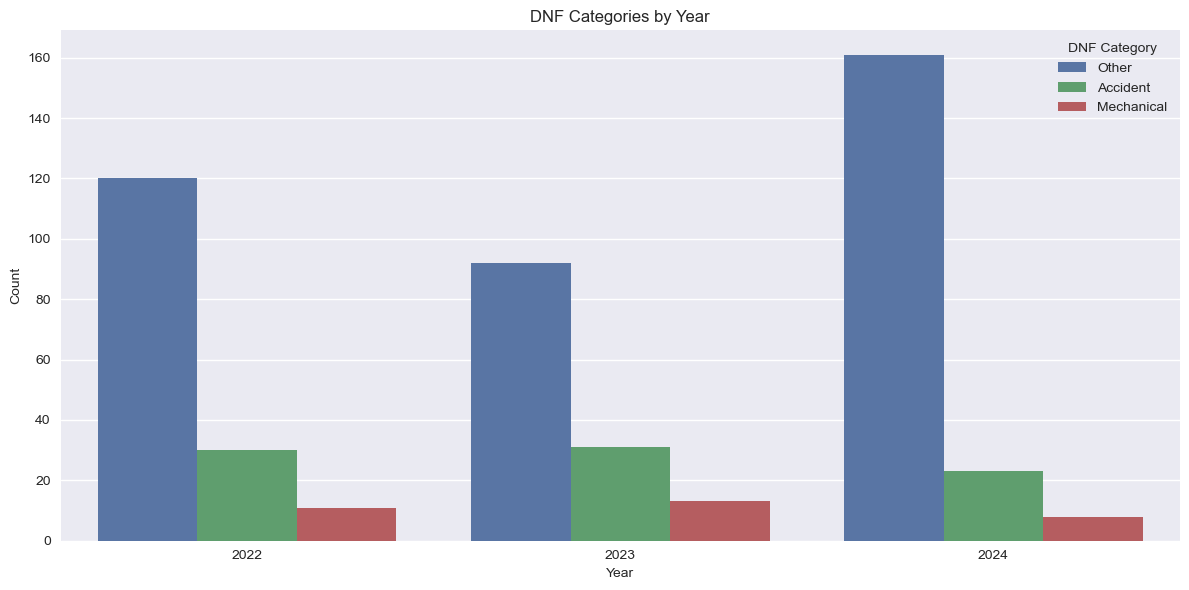

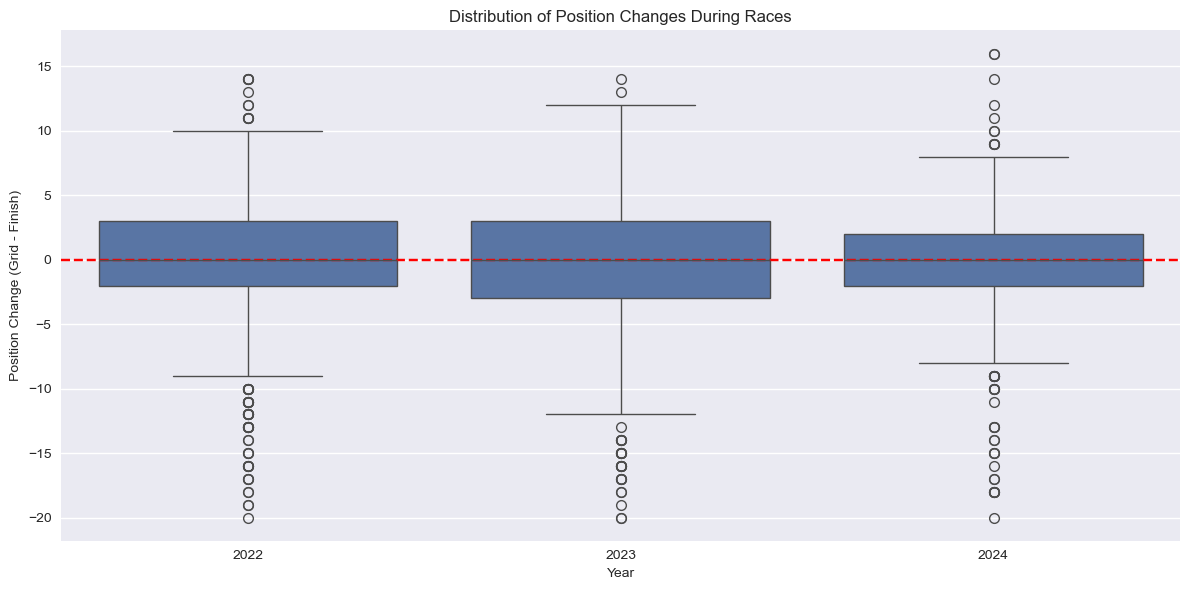

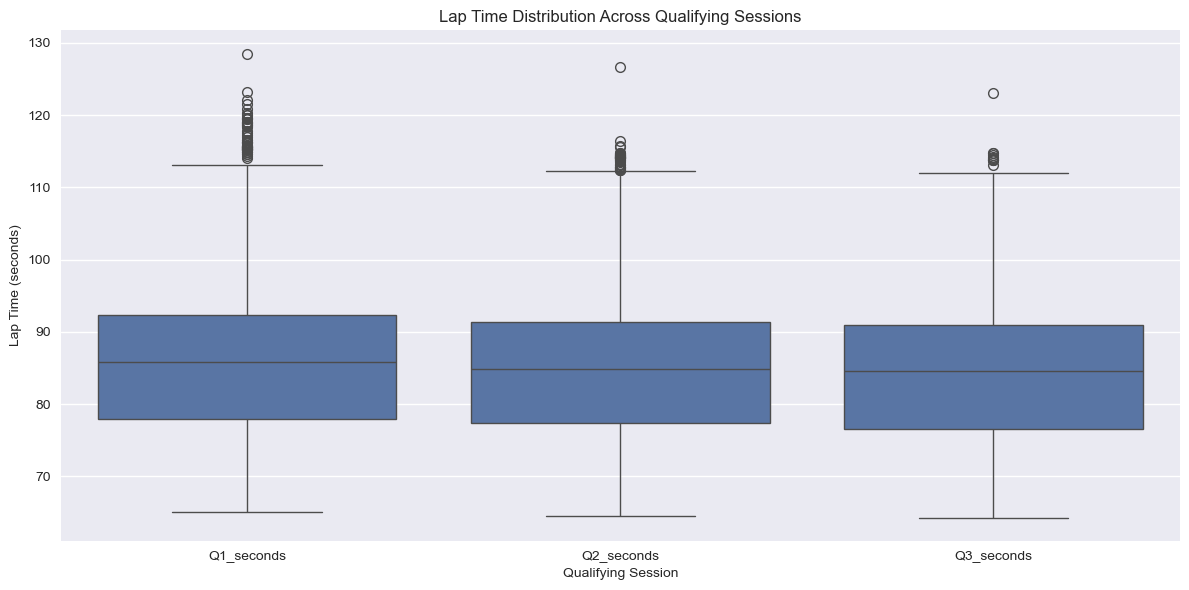

In [179]:
# Visualize the engineered features

# 1. DNF Categories by Year
plt.figure(figsize=(12, 6))
sns.countplot(data=all_race_results[all_race_results['finish_category'] != 'Finished'],
             x='year', hue='finish_category')
plt.title('DNF Categories by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='DNF Category')
plt.tight_layout()

# 2. Position Changes Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=all_race_results, x='year', y='position_change')
plt.title('Distribution of Position Changes During Races')
plt.xlabel('Year')
plt.ylabel('Position Change (Grid - Finish)')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()

# 3. Qualifying Time Improvements
q_times = all_qualifying_results.melt(
    id_vars=['year', 'driverName'],
    value_vars=['Q1_seconds', 'Q2_seconds', 'Q3_seconds'],
    var_name='qualifying_session',
    value_name='lap_time'
).dropna()

plt.figure(figsize=(12, 6))
sns.boxplot(data=q_times, x='qualifying_session', y='lap_time')
plt.title('Lap Time Distribution Across Qualifying Sessions')
plt.xlabel('Qualifying Session')
plt.ylabel('Lap Time (seconds)')
plt.tight_layout()

## Championship Points Distribution Visualization

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

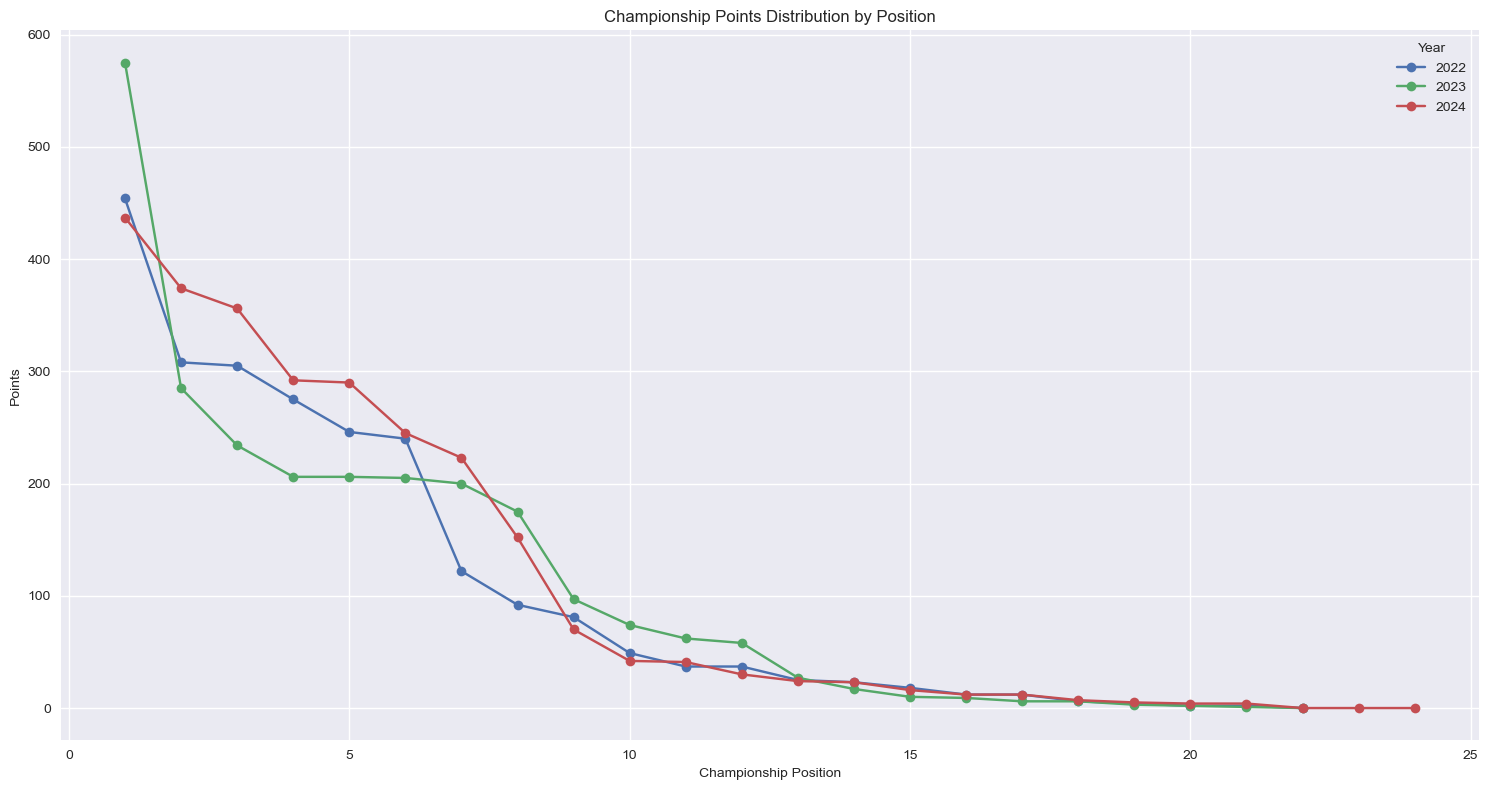

In [180]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Constructor Performance Comparison

<Figure size 1200x800 with 0 Axes>

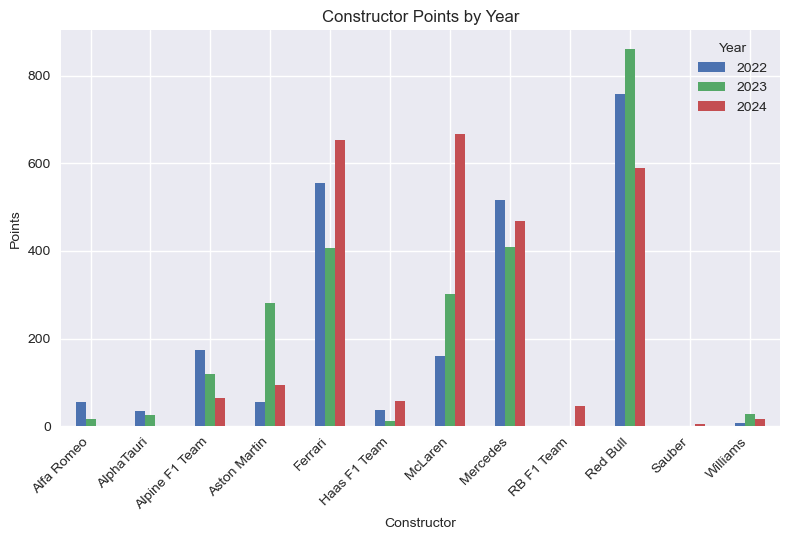

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

<Figure size 1200x800 with 0 Axes>

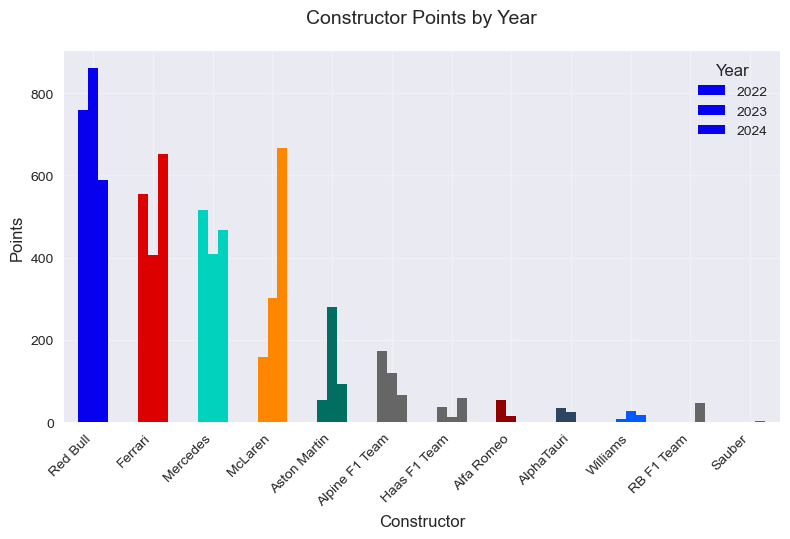

In [182]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

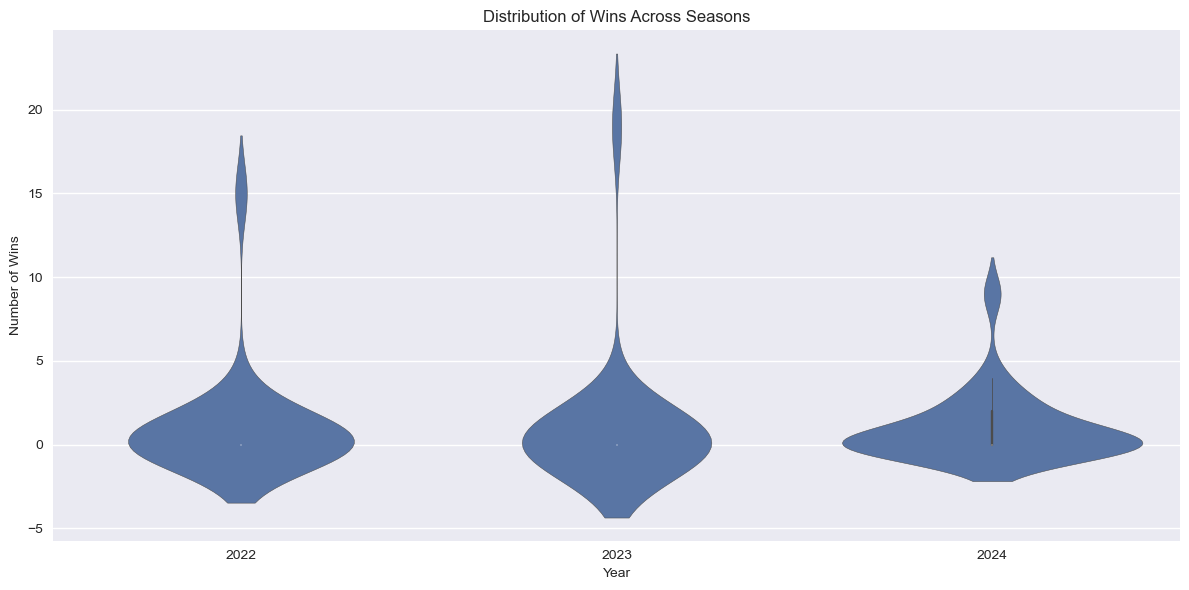

In [183]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

## Points Progression of Top Drivers

## Driver Performance Analysis

Analyzing driver performance and points progression across seasons, with colors representing their current teams.

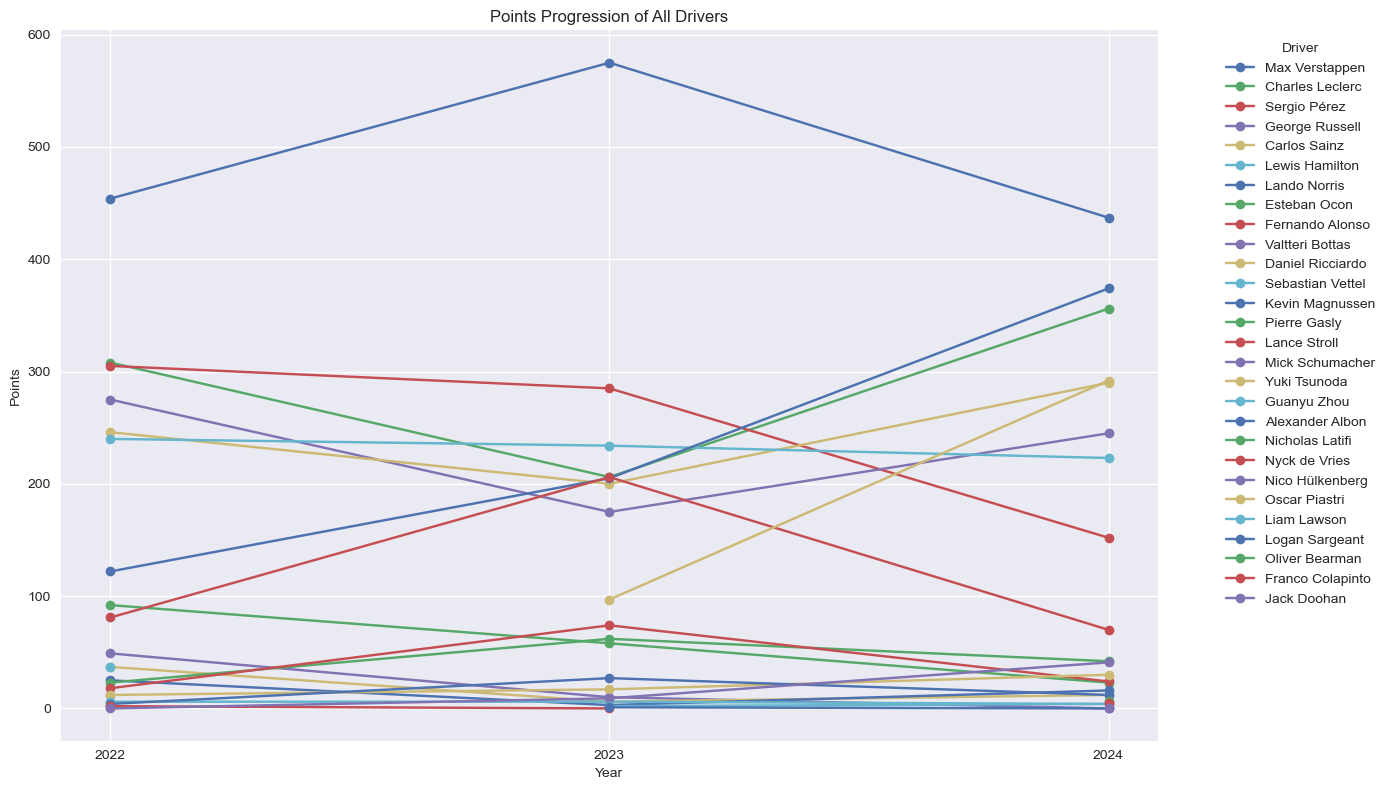

In [184]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()


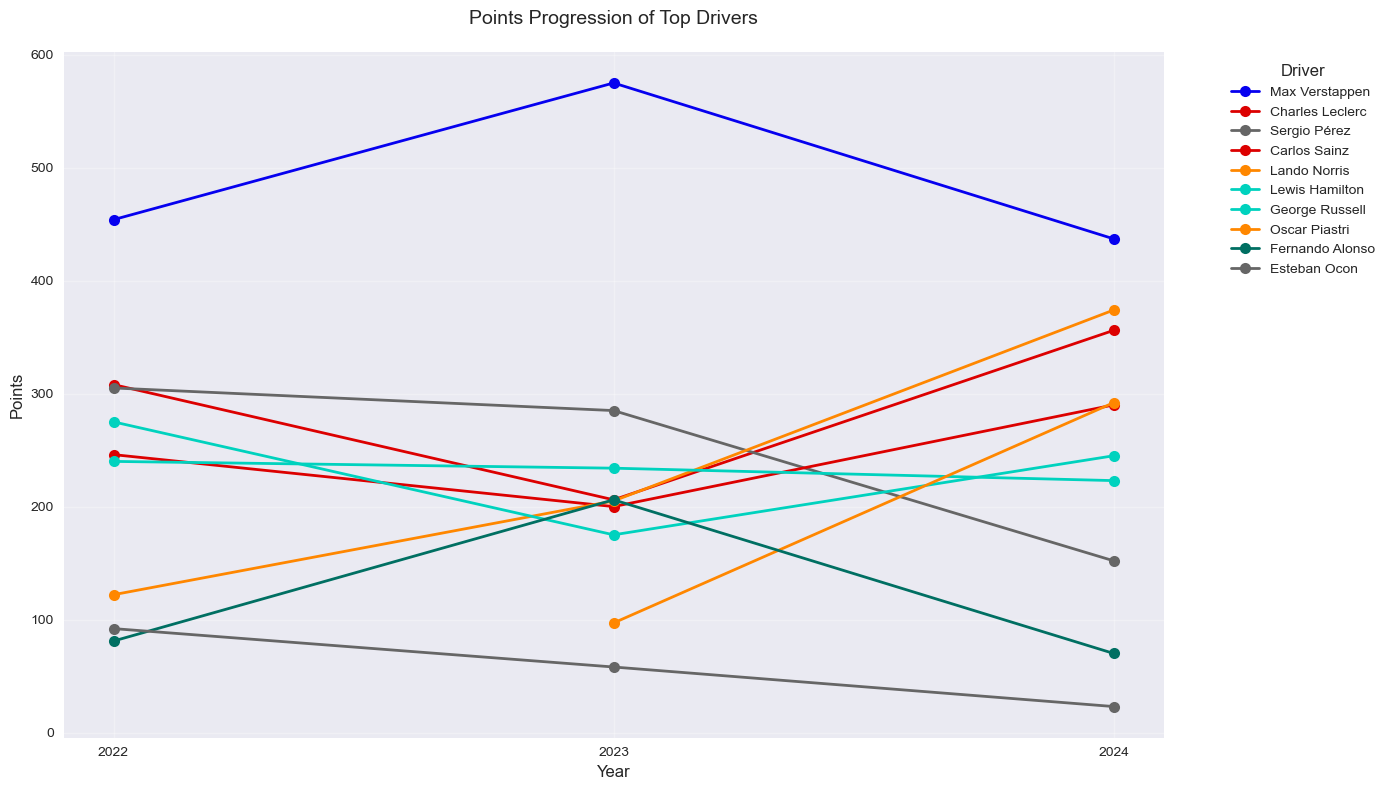

In [185]:
plt.figure(figsize=(14, 8))

# Sort drivers by total points to plot most successful drivers first
driver_total_points = all_driver_standings.groupby('driverName')['points'].sum().sort_values(ascending=False)
top_drivers = driver_total_points.head(10).index  # Show only top 10 drivers for clarity

for driver in top_drivers:
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    color = get_driver_color(driver)
    plt.plot(driver_data['year'], driver_data['points'], 
             marker='o', label=driver, color=color, linewidth=2, markersize=8)

plt.title('Points Progression of Top Drivers', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title_fontsize=12)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Race Results Analysis

Analyzing race results data including finishing positions, fastest laps, and DNFs.

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [186]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

Race Results Sample:


,year,round,raceName,date,driverName,constructorName,position,points,status,grid,laps,fastestLapTime
0,2022,1,Bahrain Grand Prix,2022-03-20,Charles Leclerc,Ferrari,1,26,Finished,1,57,1:34.570
1,2022,1,Bahrain Grand Prix,2022-03-20,Carlos Sainz,Ferrari,2,18,Finished,3,57,1:35.740
2,2022,1,Bahrain Grand Prix,2022-03-20,Lewis Hamilton,Mercedes,3,15,Finished,5,57,1:36.228
3,2022,1,Bahrain Grand Prix,2022-03-20,George Russell,Mercedes,4,12,Finished,9,57,1:36.302
4,2022,1,Bahrain Grand Prix,2022-03-20,Kevin Magnussen,Haas F1 Team,5,10,Finished,7,57,1:36.623


### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

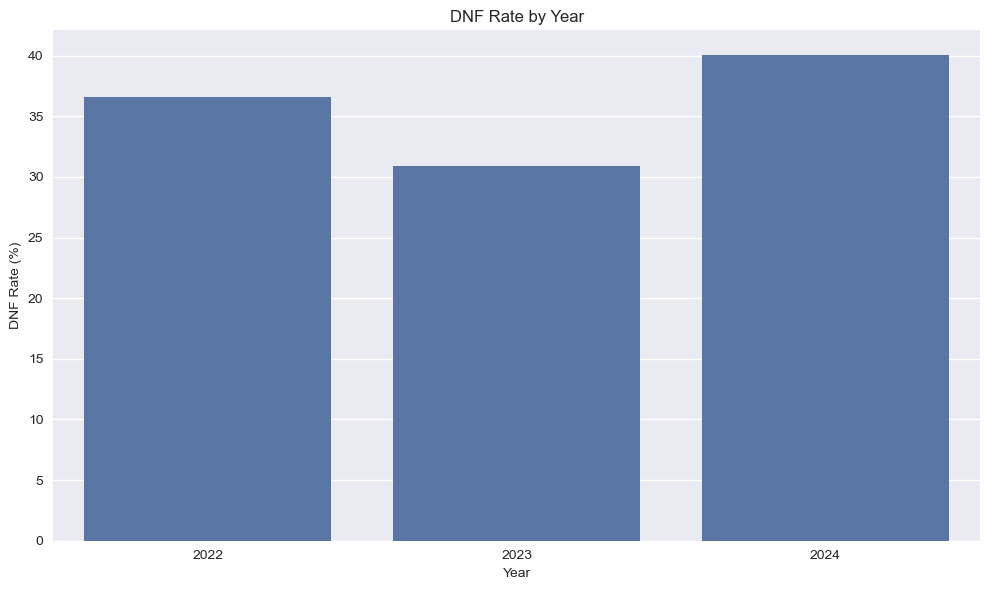

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [188]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

Qualifying Results Sample:


,year,round,raceName,date,driverName,constructorName,position,Q1,Q2,Q3
0,2022,1,Bahrain Grand Prix,2022-03-20,Charles Leclerc,Ferrari,1,1:31.471,1:30.932,1:30.558
1,2022,1,Bahrain Grand Prix,2022-03-20,Max Verstappen,Red Bull,2,1:31.785,1:30.757,1:30.681
2,2022,1,Bahrain Grand Prix,2022-03-20,Carlos Sainz,Ferrari,3,1:31.567,1:30.787,1:30.687
3,2022,1,Bahrain Grand Prix,2022-03-20,Sergio Pérez,Red Bull,4,1:32.311,1:31.008,1:30.921
4,2022,1,Bahrain Grand Prix,2022-03-20,Lewis Hamilton,Mercedes,5,1:32.285,1:31.048,1:31.238


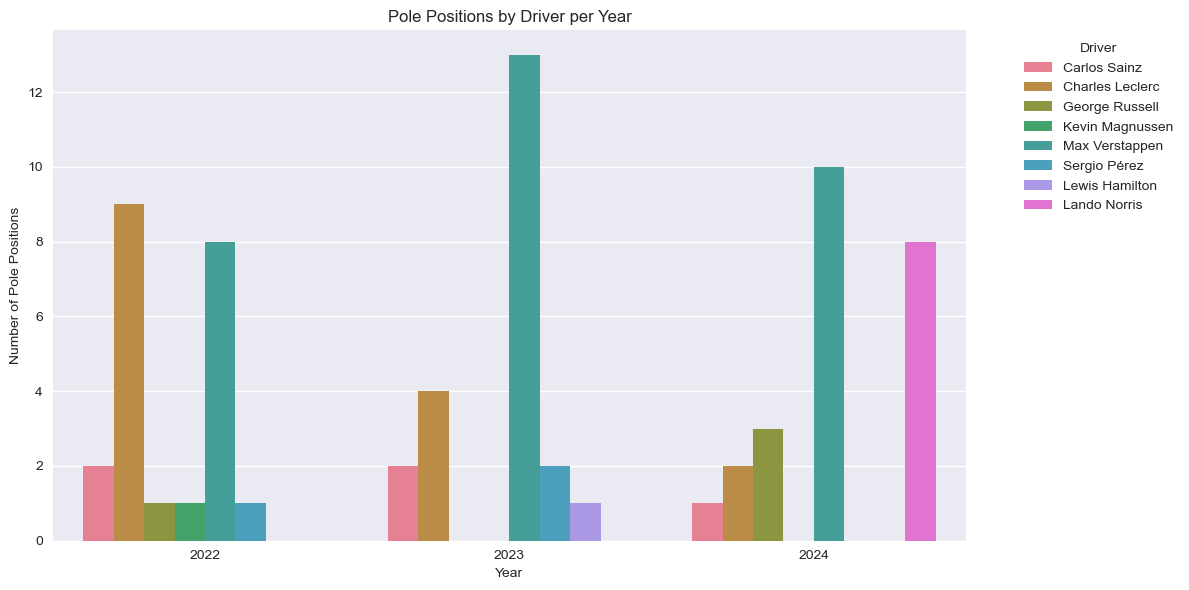

In [189]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

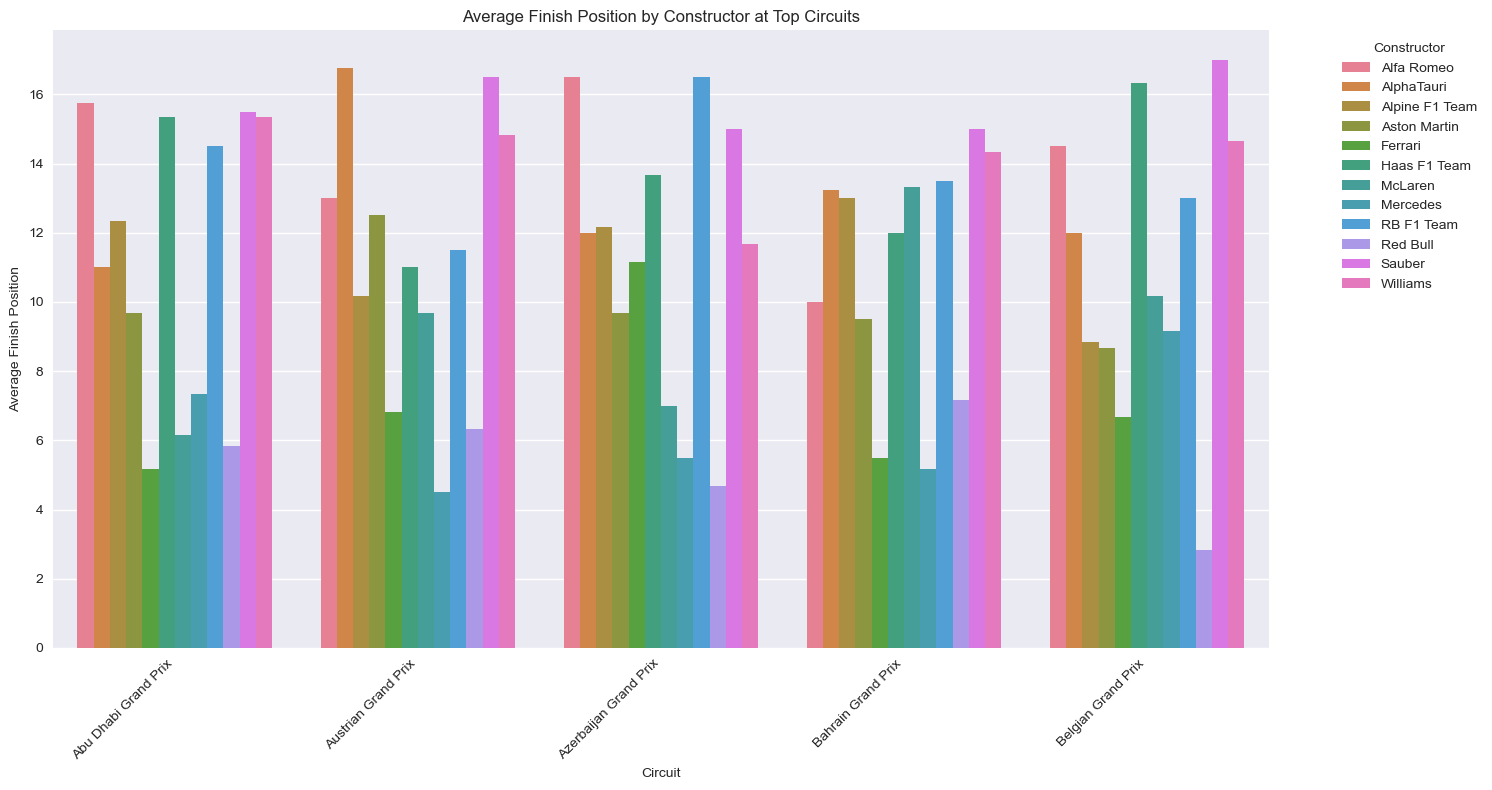

In [190]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Constructor Performance Comparison

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

## Points Progression of Top Drivers

## Driver Performance Analysis

Analyzing driver performance and points progression across seasons, with colors representing their current teams.

In [ ]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()


In [ ]:
plt.figure(figsize=(14, 8))

# Sort drivers by total points to plot most successful drivers first
driver_total_points = all_driver_standings.groupby('driverName')['points'].sum().sort_values(ascending=False)
top_drivers = driver_total_points.head(10).index  # Show only top 10 drivers for clarity

for driver in top_drivers:
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    color = get_driver_color(driver)
    plt.plot(driver_data['year'], driver_data['points'], 
             marker='o', label=driver, color=color, linewidth=2, markersize=8)

plt.title('Points Progression of Top Drivers', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title_fontsize=12)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Race Results Analysis

Analyzing race results data including finishing positions, fastest laps, and DNFs.

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [ ]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Constructor Performance Comparison

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

## Points Progression of Top Drivers

## Driver Performance Analysis

Analyzing driver performance and points progression across seasons, with colors representing their current teams.

In [ ]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()


In [ ]:
plt.figure(figsize=(14, 8))

# Sort drivers by total points to plot most successful drivers first
driver_total_points = all_driver_standings.groupby('driverName')['points'].sum().sort_values(ascending=False)
top_drivers = driver_total_points.head(10).index  # Show only top 10 drivers for clarity

for driver in top_drivers:
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    color = get_driver_color(driver)
    plt.plot(driver_data['year'], driver_data['points'], 
             marker='o', label=driver, color=color, linewidth=2, markersize=8)

plt.title('Points Progression of Top Drivers', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title_fontsize=12)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Race Results Analysis

Analyzing race results data including finishing positions, fastest laps, and DNFs.

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [ ]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Constructor Performance Comparison

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

## Points Progression of Top Drivers

## Driver Performance Analysis

Analyzing driver performance and points progression across seasons, with colors representing their current teams.

In [ ]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()


In [ ]:
plt.figure(figsize=(14, 8))

# Sort drivers by total points to plot most successful drivers first
driver_total_points = all_driver_standings.groupby('driverName')['points'].sum().sort_values(ascending=False)
top_drivers = driver_total_points.head(10).index  # Show only top 10 drivers for clarity

for driver in top_drivers:
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    color = get_driver_color(driver)
    plt.plot(driver_data['year'], driver_data['points'], 
             marker='o', label=driver, color=color, linewidth=2, markersize=8)

plt.title('Points Progression of Top Drivers', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title_fontsize=12)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Race Results Analysis

Analyzing race results data including finishing positions, fastest laps, and DNFs.

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [ ]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Constructor Performance Comparison

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

## Points Progression of Top Drivers

## Driver Performance Analysis

Analyzing driver performance and points progression across seasons, with colors representing their current teams.

In [ ]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()


In [ ]:
plt.figure(figsize=(14, 8))

# Sort drivers by total points to plot most successful drivers first
driver_total_points = all_driver_standings.groupby('driverName')['points'].sum().sort_values(ascending=False)
top_drivers = driver_total_points.head(10).index  # Show only top 10 drivers for clarity

for driver in top_drivers:
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    color = get_driver_color(driver)
    plt.plot(driver_data['year'], driver_data['points'], 
             marker='o', label=driver, color=color, linewidth=2, markersize=8)

plt.title('Points Progression of Top Drivers', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title_fontsize=12)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Race Results Analysis

Analyzing race results data including finishing positions, fastest laps, and DNFs.

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [ ]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Constructor Performance Comparison

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

## Points Progression of Top Drivers

## Driver Performance Analysis

Analyzing driver performance and points progression across seasons, with colors representing their current teams.

In [ ]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()


In [ ]:
plt.figure(figsize=(14, 8))

# Sort drivers by total points to plot most successful drivers first
driver_total_points = all_driver_standings.groupby('driverName')['points'].sum().sort_values(ascending=False)
top_drivers = driver_total_points.head(10).index  # Show only top 10 drivers for clarity

for driver in top_drivers:
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    color = get_driver_color(driver)
    plt.plot(driver_data['year'], driver_data['points'], 
             marker='o', label=driver, color=color, linewidth=2, markersize=8)

plt.title('Points Progression of Top Drivers', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title_fontsize=12)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Race Results Analysis

Analyzing race results data including finishing positions, fastest laps, and DNFs.

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [ ]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

## Track Performance Analysis

Analyzing performance patterns at different circuits.

In [ ]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Constructor Performance Comparison

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

## Points Progression of Top Drivers

## Driver Performance Analysis

Analyzing driver performance and points progression across seasons, with colors representing their current teams.

In [ ]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()

## Constructor Performance Comparison

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Points Progression of Top Drivers

## Driver Performance Analysis

Analyzing driver performance and points progression across seasons, with colors representing their current teams.

In [ ]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()


In [ ]:
plt.figure(figsize=(14, 8))

# Sort drivers by total points to plot most successful drivers first
driver_total_points = all_driver_standings.groupby('driverName')['points'].sum().sort_values(ascending=False)
top_drivers = driver_total_points.head(10).index  # Show only top 10 drivers for clarity

for driver in top_drivers:
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    color = get_driver_color(driver)
    plt.plot(driver_data['year'], driver_data['points'], 
             marker='o', label=driver, color=color, linewidth=2, markersize=8)

plt.title('Points Progression of Top Drivers', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title_fontsize=12)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Race Results Analysis

Analyzing race results data including finishing positions, fastest laps, and DNFs.

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [ ]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

## Race Results Analysis

Analyzing race results data including finishing positions, fastest laps, and DNFs.

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [ ]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Constructor Performance Comparison

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)



# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

## Points Progression of Top Drivers

## Driver Performance Analysis

Analyzing driver performance and points progression across seasons, with colors representing their current teams.

In [ ]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()

## Race Results Analysis

Analyzing race results data including finishing positions, fastest laps, and DNFs.

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [ ]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Constructor Performance Comparison

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

## Points Progression of Top Drivers

## Driver Performance Analysis

Analyzing driver performance and points progression across seasons, with colors representing their current teams.

In [ ]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()

## Race Results Analysis

Analyzing race results data including finishing positions, fastest laps, and DNFs.

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [ ]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Constructor Performance Comparison

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

## Points Progression of Top Drivers

## Driver Performance Analysis

Analyzing driver performance and points progression across seasons, with colors representing their current teams.

In [ ]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()

In [ ]:
plt.figure(figsize=(14, 8))

# Sort drivers by total points to plot most successful drivers first
driver_total_points = all_driver_standings.groupby('driverName')['points'].sum().sort_values(ascending=False)
top_drivers = driver_total_points.head(10).index  # Show only top 10 drivers for clarity

for driver in top_drivers:
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    color = get_driver_color(driver)
    plt.plot(driver_data['year'], driver_data['points'], 
             marker='o', label=driver, color=color, linewidth=2, markersize=8)

plt.title('Points Progression of Top Drivers', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title_fontsize=12)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Race Results Analysis

Analyzing race results data including finishing positions, fastest laps, and DNFs.

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [ ]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Constructor Performance Comparison

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

## Points Progression of Top Drivers

## Driver Performance Analysis

Analyzing driver performance and points progression across seasons, with colors representing their current teams.

In [ ]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()

In [ ]:
plt.figure(figsize=(14, 8))

# Sort drivers by total points to plot most successful drivers first
driver_total_points = all_driver_standings.groupby('driverName')['points'].sum().sort_values(ascending=False)
top_drivers = driver_total_points.head(10).index  # Show only top 10 drivers for clarity

for driver in top_drivers:
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    color = get_driver_color(driver)
    plt.plot(driver_data['year'], driver_data['points'], 
             marker='o', label=driver, color=color, linewidth=2, markersize=8)

plt.title('Points Progression of Top Drivers', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title_fontsize=12)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Race Results Analysis

Analyzing race results data including finishing positions, fastest laps, and DNFs.

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [ ]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Constructor Performance Comparison

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

## Points Progression of Top Drivers

## Driver Performance Analysis

Analyzing driver performance and points progression across seasons, with colors representing their current teams.

In [ ]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()

In [ ]:
plt.figure(figsize=(14, 8))

# Sort drivers by total points to plot most successful drivers first
driver_total_points = all_driver_standings.groupby('driverName')['points'].sum().sort_values(ascending=False)
top_drivers = driver_total_points.head(10).index  # Show only top 10 drivers for clarity

for driver in top_drivers:
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    color = get_driver_color(driver)
    plt.plot(driver_data['year'], driver_data['points'], 
             marker='o', label=driver, color=color, linewidth=2, markersize=8)

plt.title('Points Progression of Top Drivers', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title_fontsize=12)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Race Results Analysis

Analyzing race results data including finishing positions, fastest laps, and DNFs.

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [ ]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Constructor Performance Comparison

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()

In [ ]:
plt.figure(figsize=(14, 8))

# Sort drivers by total points to plot most successful drivers first
driver_total_points = all_driver_standings.groupby('driverName')['points'].sum().sort_values(ascending=False)
top_drivers = driver_total_points.head(10).index  # Show only top 10 drivers for clarity

for driver in top_drivers:
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    color = get_driver_color(driver)
    plt.plot(driver_data['year'], driver_data['points'], 
             marker='o', label=driver, color=color, linewidth=2, markersize=8)

plt.title('Points Progression of Top Drivers', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title_fontsize=12)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])
plt.grid(True, alpha=0.3)
plt.tight_layout()

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
plt.figure(figsize=(15, 8))
for year in [2022, 2023, 2024]:
    year_data = driver_standings[year].sort_values('position')
    plt.plot(year_data['position'], year_data['points'], marker='o', label=str(year))

plt.title('Championship Points Distribution by Position')
plt.xlabel('Championship Position')
plt.ylabel('Points')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

## Constructor Performance Comparison

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison using team colors
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = constructor_yearly_points.plot(kind='bar', width=0.8)

# Apply team colors to bars
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')  # Use gray as fallback color
    # For each year's set of bars
    for j in range(len(constructor_yearly_points.columns)):
        bar_idx = i + j * len(constructor_yearly_points)
        if bar_idx < len(ax.patches):
            ax.patches[bar_idx].set_facecolor(color)
            ax.patches[bar_idx].set_alpha(0.8)  # Add some transparency

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# Create pivot table for constructor points
constructor_yearly_points = pd.pivot_table(
    all_constructor_standings,
    values='points',
    index='constructorName',
    columns='year'
).fillna(0)

# Sort constructors by total points
constructor_yearly_points['total'] = constructor_yearly_points.sum(axis=1)
constructor_yearly_points = constructor_yearly_points.sort_values('total', ascending=False)
constructor_yearly_points = constructor_yearly_points.drop('total', axis=1)

# Plot constructor comparison
plt.figure(figsize=(12, 8))
ax = constructor_yearly_points.plot(kind='bar')

# Apply team colors
num_years = len(constructor_yearly_points.columns)
num_teams = len(constructor_yearly_points.index)
for i, constructor in enumerate(constructor_yearly_points.index):
    color = f1_team_colors.get(constructor, '#666666')
    for j in range(num_years):
        patch_index = i + j * num_teams
        if patch_index < len(ax.patches):
            ax.patches[patch_index].set_facecolor(color)

plt.title('Constructor Points by Year', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Year', title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Win Distribution Analysis

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_driver_standings, x='year', y='wins', inner='box')
plt.title('Distribution of Wins Across Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.tight_layout()

## Points Progression of Top Drivers

## Driver Performance Analysis

Analyzing driver performance and points progression across seasons, with colors representing their current teams.

In [ ]:
plt.figure(figsize=(14, 8))
for driver in all_driver_standings['driverName'].unique():
    driver_data = all_driver_standings[all_driver_standings['driverName'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)

plt.title('Points Progression of All Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks([2022, 2023, 2024], [2022, 2023, 2024])  # Show only 2022, 2023, 2024 on x-axis
plt.tight_layout()


## Race Results Analysis

Analyzing race results data including finishing positions, fastest laps, and DNFs.

## Race Results Analysis

This section analyzes race performance data including:
- Finishing positions and points
- DNF rates and types
- Track-specific performance patterns
- Constructor performance trends

In [ ]:
# Load race results data
race_results = {}
for year in [2022, 2023, 2024]:
    race_results[year] = pd.read_csv(f'data_csv/results_{year}_all_rounds.csv')

# Merge all results
all_race_results = pd.concat(race_results.values(), ignore_index=True)

# Display sample
print('Race Results Sample:')
display(all_race_results.head())

### DNF Analysis
Analyzing Did Not Finish (DNF) rates across seasons

In [ ]:
# Calculate DNF rates per constructor and year
dnf_by_team = all_race_results.groupby(['year', 'constructorName']).agg(
    total_races=('status', 'count'),
    dnfs=('status', lambda x: (x != 'Finished').sum())
).reset_index()

dnf_by_team['dnf_rate'] = (dnf_by_team['dnfs'] / dnf_by_team['total_races']) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dnf_by_team, x='year', y='dnf_rate', hue='constructorName')

# Apply team colors to bars
for i, bar in enumerate(ax.patches):
    constructor = dnf_by_team.iloc[i % len(dnf_by_team['constructorName'].unique())]['constructorName']
    bar.set_facecolor(f1_team_colors.get(constructor, '#666666'))

plt.title('DNF Rate by Constructor and Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DNF Rate (%)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Qualifying Performance Analysis

Analyzing qualifying times and grid positions across seasons.

## Qualifying Performance Analysis

Analyzing qualifying session performance including:
- Pole position distribution
- Qualifying time improvements
- Team qualifying pace
- Q1 to Q3 progression

In [ ]:
# Load qualifying data
qualifying_results = {}
for year in [2022, 2023, 2024]:
    qualifying_results[year] = pd.read_csv(f'data_csv/qualifying_{year}_all_rounds.csv')

# Merge all qualifying data
all_qualifying_results = pd.concat(qualifying_results.values(), ignore_index=True)

# Display sample
print('Qualifying Results Sample:')
display(all_qualifying_results.head())

In [ ]:
# Analyze pole positions
pole_positions = all_qualifying_results[all_qualifying_results['position'] == 1]
pole_counts = pole_positions.groupby(['year', 'driverName']).size().reset_index(name='poles')

plt.figure(figsize=(12, 6))
sns.barplot(data=pole_counts, x='year', y='poles', hue='driverName')
plt.title('Pole Positions by Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pole Positions')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Track Performance Analysis

Analyzing performance patterns at different circuits.

## Track Performance Analysis

Analyzing performance patterns at different circuits, including:
- Constructor performance by track
- Average finishing positions
- Team strengths at specific circuits
- Historical track performance trends

In [ ]:
track_performance = all_race_results.groupby(['raceName', 'constructorName'])['position'].agg(['mean', 'count']).reset_index()

# Filter for tracks with sufficient data
top_tracks = track_performance.groupby('raceName')['count'].sum().nlargest(5).index
track_perf_filtered = track_performance[track_performance['raceName'].isin(top_tracks)]

plt.figure(figsize=(15, 8))
sns.barplot(data=track_perf_filtered, x='raceName', y='mean', hue='constructorName')
plt.title('Average Finish Position by Constructor at Top Circuits')
plt.xlabel('Circuit')
plt.ylabel('Average Finish Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
# Aggregate qualifying data by constructor
qual_perf = enhanced_qualifying_results.groupby(['year', 'constructorName'])['q3_time_seconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=qual_perf, x='year', y='q3_time_seconds', hue='constructorName', marker='o')

# Apply team colors to lines
for line in ax.get_lines():
    constructor = line.get_label()
    line.set_color(f1_team_colors.get(constructor, '#666666'))

plt.title('Average Q3 Times by Constructor', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Q3 Time (seconds)', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Top 10 Drivers Championship Standings by Year

Visualizing the top 10 drivers in the championship standings for each year, colored by their team.

In [ ]:
# Get top 10 drivers per year
top_drivers = all_driver_standings.groupby('year').last().reset_index()
top_drivers = top_drivers.sort_values(['year', 'points'], ascending=[True, False])
top_drivers = top_drivers.groupby('year').head(10)

plt.figure(figsize=(15, 8))
ax = None

for year in top_drivers['year'].unique():
    year_data = top_drivers[top_drivers['year'] == year]
    
    # Create horizontal bar chart
    if ax is None:
        ax = plt.gca()
    
    bars = ax.barh(
        [f"{driver} ({year})" for driver in year_data['driverName']], 
        year_data['points'],
        alpha=0.8
    )
    
    # Color bars by team
    for bar, driver in zip(bars, year_data['driverName']):
        team = driver_team_mapping.get(driver)
        if team:
            bar.set_color(f1_team_colors.get(team, '#666666'))

plt.title('Top 10 Drivers Championship Standings by Year', fontsize=14, pad=20)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Driver (Year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Data Visualization and Analysis

This section presents various visualizations of F1 data, using official team colors for better representation and understanding of the sport's dynamics.

## Championship Analysis

Analyzing points distribution and performance across seasons.

In [ ]:
# Track performance analysis
track_perf = all_race_results.groupby(['circuitName', 'constructorName'])['points'].mean().reset_index()

plt.figure(figsize=(15, 8))
for constructor in sorted(track_perf['constructorName'].unique()):
    data = track_perf[track_perf['constructorName'] == constructor]
    plt.plot(data['circuitName'], data['points'],
             label=constructor,
             marker='o',
             color=f1_team_colors.get(constructor, '#666666'))

plt.xticks(rotation=45, ha='right')
plt.title('Average Points per Circuit by Constructor', fontsize=14, pad=20)
plt.xlabel('Circuit', fontsize=12)
plt.ylabel('Average Points', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Track Performance Analysis
This visualization shows how each constructor performs across different circuits, using team-specific colors for better identification.

## Save Enhanced Data
Save our enhanced datasets with all the engineered features for future use.

In [ ]:
# Save enhanced datasets with new features
enhanced_race_results.to_csv('analyses/enhanced_race_results.csv', index=False)
enhanced_qualifying_results.to_csv('analyses/enhanced_qualifying_results.csv', index=False)

# Save aggregated performance metrics
track_perf.to_csv('analyses/track_performance.csv', index=False)

print('Enhanced datasets saved successfully!')